### **Customer Sentiment Analyasis on iPhone 15 128GB Reviews on Flipkart**

In [1]:
pip install selenium

   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.4 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/9.4 MB 6.2 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.4 MB 6.4 MB/s eta 0:00:01
   ----------------------- ---------------- 5.5/9.4 MB 6.5 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.4 MB 6.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.4 MB 6.4 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.4 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.4/9.4 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully unins


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)

In [3]:
URL = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKAR"
names, ratings, reviews = [], [], []


for page in range(1, 16):
    print(f"Scraping page {page}...")
    try:
        driver.get(URL + f"&page={page}")
        time.sleep(5)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        name_tags = soup.find_all("p", class_="_2NsDsF AwS1CA")
        rating_tags = soup.find_all("div", class_="XQDdHH Ga3i8K")
        review_tags = soup.find_all("div", class_="ZmyHeo")

        for name_tag, rating_tag, review_tag in zip(name_tags, rating_tags, review_tags):
            name = name_tag.text.strip()
            rating = rating_tag.text.strip()
            review = review_tag.get_text(strip=True)
            names.append(name)
            ratings.append(rating)
            reviews.append(review)

    except Exception as e:
        print(f"Failed to load page {page}: {e}")
        continue

driver.quit()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...


In [6]:
df = pd.DataFrame({
    "Username": names,
    "Rating": ratings,
    "Review": reviews
})

In [7]:
df.head()

,Username,Rating,Review
0,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Ajin V,5,High quality camera😍READ MORE
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
4,Mousam Guha Roy,4,Very niceREAD MORE


In [27]:
import requests
from bs4 import BeautifulSoup
import time

In [28]:
URL = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKAR"

# Customer user-agent header to prevent blocking
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Loop through multiple pages
for page in range(1, 16):  
    print(f"\n--- Page {page} ---")
    
    # Format URL with current page number
    URL ="https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKAR%22".format(page)
    
    # Send GET request
    response = requests.get(URL, headers=headers)
    
    # Parse HTML response
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    reviews = soup.find_all("div", class_="wTYmpv")  # This class might change

    # Set to store unique reviews
    unique_reviews = set()

    
    # Check if reviews are found
    if not reviews:
        print("No more reviews or blocked by Flipkart.")
        break
    
    # Print each review
    for review in reviews:
        print(review.get_text(strip=True))
    
    time.sleep(2)  # Be polite and avoid triggering anti-bot measures



--- Page 1 ---
No more reviews or blocked by Flipkart.


In [22]:
import requests

URL = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKAR"
response = requests.get(URL)  # ✅ No unexpected indent
print(response.status_code)

200


### **Data Cleaning and Preprocessing**

In [33]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Review'] = df['Review'].apply(clean_text)

In [34]:
df.head()

,Username,Rating,Review
0,Rishabh Jha,5,awesome read
1,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...
2,Ajin V,5,high quality cameraread
3,Nikhil Kumar,5,switch oneplus iphone stunned camera performan...
4,Mousam Guha Roy,4,niceread


In [35]:
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df[['Review', 'Polarity']]

,Review,Polarity
0,awesome read,1.000000
1,go itamazing onebeautiful camera super fast pr...,0.266667
2,high quality cameraread,0.160000
3,switch oneplus iphone stunned camera performan...,1.000000
4,niceread,0.000000
...,...,...
118,pic quality awesomeread,0.000000
119,camera quality superb battery backup alsoread,1.000000
120,good phone display hz slow read,0.200000
121,good product value money term suitable type pr...,0.412500


In [36]:
df['Subjectivity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df[['Review', 'Subjectivity']]

,Review,Subjectivity
0,awesome read,1.000000
1,go itamazing onebeautiful camera super fast pr...,0.633333
2,high quality cameraread,0.540000
3,switch oneplus iphone stunned camera performan...,1.000000
4,niceread,0.000000
...,...,...
118,pic quality awesomeread,0.000000
119,camera quality superb battery backup alsoread,1.000000
120,good phone display hz slow read,0.500000
121,good product value money term suitable type pr...,0.562500


In [37]:
df['Sentiment'] = df['Polarity'].apply(lambda x: "Positive" if x >= 0.1 else "Negative")
df

,Username,Rating,Review,Polarity,Subjectivity,Sentiment
0,Rishabh Jha,5,awesome read,1.000000,1.000000,Positive
1,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive
2,Ajin V,5,high quality cameraread,0.160000,0.540000,Positive
3,Nikhil Kumar,5,switch oneplus iphone stunned camera performan...,1.000000,1.000000,Positive
4,Mousam Guha Roy,4,niceread,0.000000,0.000000,Negative
...,...,...,...,...,...,...
118,Mukesh Kumar,5,pic quality awesomeread,0.000000,0.000000,Negative
119,Rahul Sharma,5,camera quality superb battery backup alsoread,1.000000,1.000000,Positive
120,Sushobhit Meena,4,good phone display hz slow read,0.200000,0.500000,Positive
121,Malay Singha,5,good product value money term suitable type pr...,0.412500,0.562500,Positive


In [38]:
df["Polarity"].mean()

np.float64(0.45358810716534304)

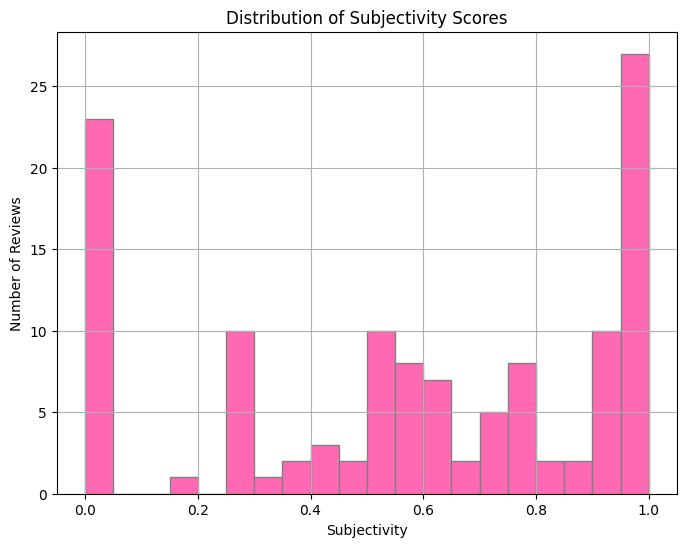

In [40]:
plt.figure(figsize=(8,6))
df['Subjectivity'].hist(bins=20, color='Hotpink', edgecolor='grey')
plt.title("Distribution of Subjectivity Scores")
plt.xlabel("Subjectivity")
plt.ylabel("Number of Reviews")
plt.show()

C:\Users\AMRUTA\AppData\Local\Temp\ipykernel_10168\1446078398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment',palette='deep')


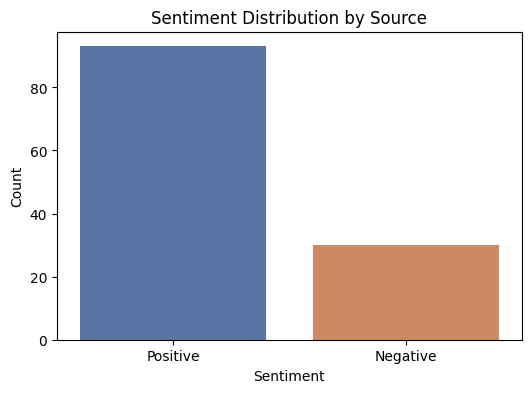

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment',palette='deep')  
plt.title("Sentiment Distribution by Source")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

C:\Users\AMRUTA\AppData\Local\Temp\ipykernel_10168\962323766.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Rating', y='Polarity', palette='bright')


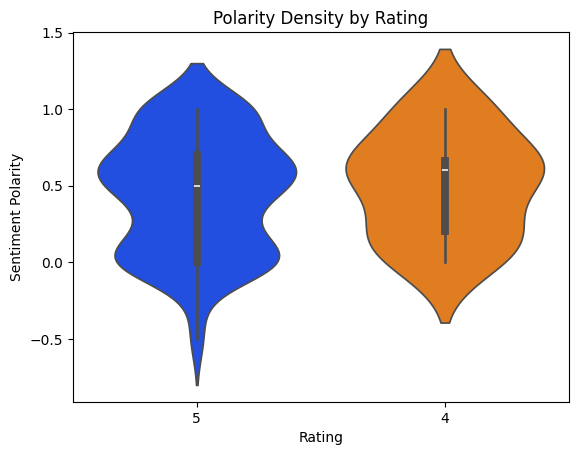

In [54]:
sns.violinplot(data=df, x='Rating', y='Polarity', palette='bright')
plt.title("Polarity Density by Rating")
plt.xlabel("Rating")
plt.ylabel("Sentiment Polarity")
plt.show()

In [75]:
df

,Username,Rating,Review,Polarity,Subjectivity,Sentiment,Review_Length
0,Rishabh Jha,5,awesome read,1.000000,1.000000,Positive,2
1,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive,7
2,Ajin V,5,high quality cameraread,0.160000,0.540000,Positive,3
3,Nikhil Kumar,5,switch oneplus iphone stunned camera performan...,1.000000,1.000000,Positive,10
4,Mousam Guha Roy,4,niceread,0.000000,0.000000,Negative,1
...,...,...,...,...,...,...,...
118,Mukesh Kumar,5,pic quality awesomeread,0.000000,0.000000,Negative,3
119,Rahul Sharma,5,camera quality superb battery backup alsoread,1.000000,1.000000,Positive,6
120,Sushobhit Meena,4,good phone display hz slow read,0.200000,0.500000,Positive,6
121,Malay Singha,5,good product value money term suitable type pr...,0.412500,0.562500,Positive,17


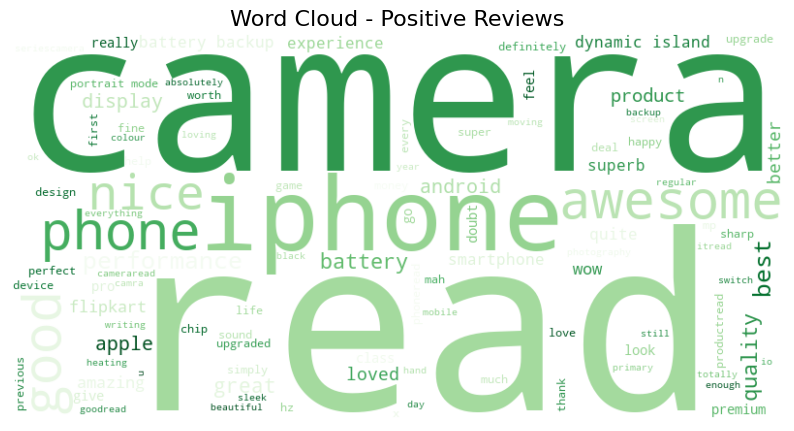

In [62]:

# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive reviews (adjust 'Sentiment' and 'Review' to match the DataFrame)
positive_reviews = df[df['Sentiment'] == 'Positive']

# Join all positive review text into one string
text = " ".join(review for review in positive_reviews['Review'])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens', max_words=100).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews", fontsize=16)
plt.show()


Text(0.5, 1.0, 'Word Cloud - Negative Reviews')

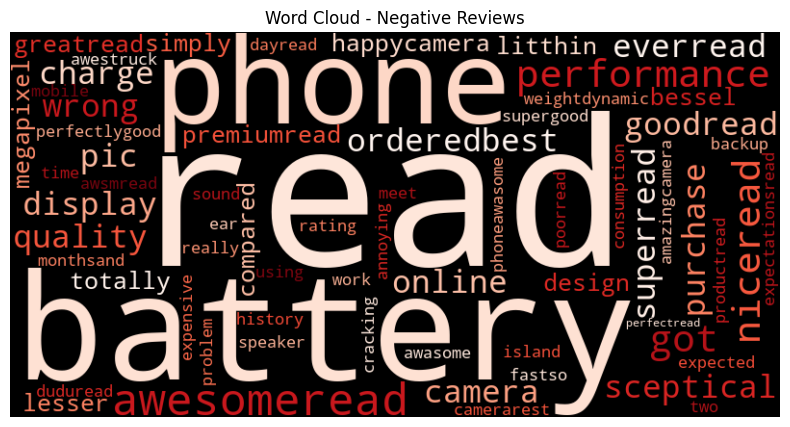

In [64]:
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Review'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")

C:\Users\AMRUTA\AppData\Local\Temp\ipykernel_10168\2657703474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='deep')


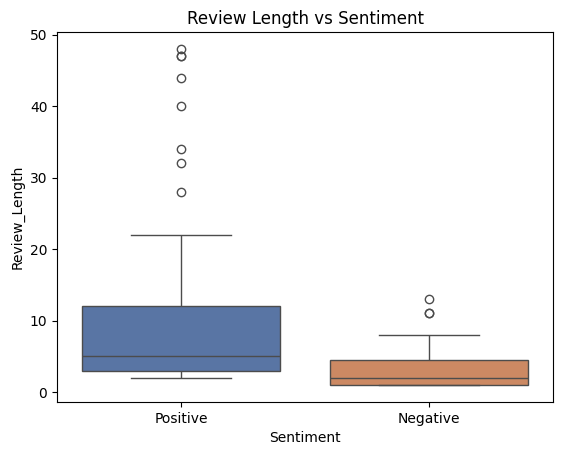

In [74]:
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))

sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='deep')
plt.title("Review Length vs Sentiment")
plt.show()


### **Thank You**